In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Neural Networks and Deep Learning

<img src="dcr.png" alt="title1" width="1150"/>

# Setup

In [2]:
import warnings; warnings.simplefilter('ignore')
from dcr import *
%matplotlib inline

In [3]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams.update({'font.size': 12})

# Synopsis

- Artificial Neural Networks (ANN)
- Non-linear extensions of regression models
- Class Multi-Layer-Perceptron (MLP)
- For PDs: sklearn.neural_network module and class MLPClassifier 
- Extension: Keras/Tensorflow

# Neural Networks and Deep Learning

## Idea

- Single-Layer Perceptron shown below
- Consists of 
    - inputs/features ($x$) (input layer)
    - outputs ($y$) (output layer)
    - hidden layer ("derived features"): (non-) linear ("activation") functions of $x$
 - Fitted values for $y$ computed as (non-) linear ("activation") functions of the derived features, e.g., sigmoid/logistic
 
\begin{align*}
	\sigma (v) = \frac{1}{1+\exp(-v)}
\end{align*}

- Architecture with more than one hidden layer: Deep network/ deep Learning

![NN1](NN1.jpg)

## Simple Network without Hidden Layer  

![NN2](NN2.jpg)

In [4]:
np.random.seed(1234)
n = 2000
sigma = 1
mean_X = [0, 0]
cov_X = [[1, 0], [0, 1]] 

X_train = np.random.multivariate_normal(mean_X, cov_X, n)
X_test = np.random.multivariate_normal(mean_X, cov_X, n)

bias = -1
w1 = 1
w2 = -0.8

def inv_logit(eta):
    return np.exp(eta) / (1 + np.exp(eta))

lin_pred_train = bias + w1 * X_train[:,0] +w2 * X_train[:,1]
lin_pred_test = bias + w1 * X_test[:,0] +w2 * X_test[:,1]

PD_train = inv_logit(lin_pred_train)
PD_test = inv_logit(lin_pred_test)

y_train = np.random.binomial(1, PD_train)
y_test = np.random.binomial(1, PD_test)

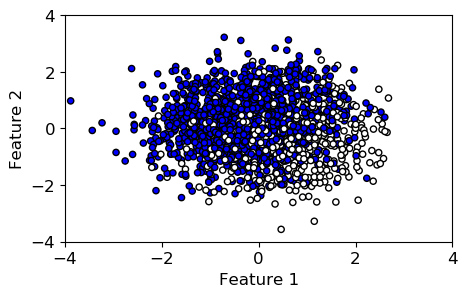

In [5]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#0000FF', '#00FF00', '#FFFFFF'])
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
model_lr = LogisticRegression(penalty='none', fit_intercept=True, solver='saga', n_jobs=2,  tol =1e-15, max_iter=2000)
model_lr.fit(X_train, y_train)

print('Coefficients:', model_lr.coef_.round(decimals=4))
print('Intercept:', model_lr.intercept_.round(decimals=4))

predictions = model_lr.predict_proba(X_test)[:,1].T
predictions_cat = model_lr.predict(X_test)

print(classification_report(y_test,predictions_cat))
print(confusion_matrix(y_test,predictions_cat))
print("Log Loss:", log_loss(y_test, predictions))
print("AUC:", roc_auc_score(y_test, predictions))
print("Brier score: (the smaller the better):", brier_score_loss(y_test, predictions))

Coefficients: [[ 1.0895 -0.7983]]
Intercept: [-0.9784]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1341
           1       0.68      0.48      0.56       659

    accuracy                           0.75      2000
   macro avg       0.73      0.68      0.69      2000
weighted avg       0.74      0.75      0.74      2000

[[1194  147]
 [ 345  314]]
Log Loss: 0.5001806175080926
AUC: 0.7995844833029504
Brier score: (the smaller the better): 0.16547722815294402


Next we fit a neural network. We specify

- Random starting seed for generating initial weights
- Learning rate of the network
- Maximum number of iterations
- Stochastic gradient descent as solver
- Validation fraction for crossvalidation with option `shuffle=True`, which means that the crossvalidation samples are randomly drawn each time
- Early-stopping criterion
- Regularization $\alpha$

In [7]:
model_nn = MLPClassifier(hidden_layer_sizes=(), random_state=2, max_iter=500, 
                         solver='sgd', learning_rate='adaptive', learning_rate_init=0.1, validation_fraction=0.3,
                         verbose=True, n_iter_no_change=10, early_stopping=False, alpha=0.01, shuffle=True)
model_nn.fit(X_train, y_train)

Iteration 1, loss = 0.64755367
Iteration 2, loss = 0.50983783
Iteration 3, loss = 0.50588480
Iteration 4, loss = 0.50197854
Iteration 5, loss = 0.49971978
Iteration 6, loss = 0.49926746
Iteration 7, loss = 0.49883322
Iteration 8, loss = 0.49887180
Iteration 9, loss = 0.49907764
Iteration 10, loss = 0.49904098
Iteration 11, loss = 0.49912151
Iteration 12, loss = 0.49875656
Iteration 13, loss = 0.49907818
Iteration 14, loss = 0.49888034
Iteration 15, loss = 0.49914214
Iteration 16, loss = 0.49870456
Iteration 17, loss = 0.49892519
Iteration 18, loss = 0.49876595
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 19, loss = 0.49878035
Iteration 20, loss = 0.49873161
Iteration 21, loss = 0.49879082
Iteration 22, loss = 0.49871227
Iteration 23, loss = 0.49874870
Iteration 24, loss = 0.49868878
Iteration 25, loss = 0.49867918
Iteration 26, loss = 0.49867219
Iteration 27, loss = 0.49871712
Iteration 28, loss = 0.49868983

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='adaptive',
              learning_rate_init=0.1, max_fun=15000, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.3, verbose=True, warm_start=False)

In [8]:
print('Weights:', np.array(model_nn.coefs_).round(4))
print('Biases:', np.array(model_nn.intercepts_).round(4))

Weights: [[[ 1.0889]
  [-0.7982]]]
Biases: [[-0.9785]]


In [9]:
predictions = model_nn.predict_proba(X_test)[:,1].T
predictions_cat = model_nn.predict(X_test)

print(classification_report(y_test,predictions_cat))
print(confusion_matrix(y_test,predictions_cat))
print("Log Loss:", log_loss(y_test, predictions))
print("AUC:", roc_auc_score(y_test, predictions))  
print("Brier score: (the smaller the better):", brier_score_loss(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1341
           1       0.68      0.47      0.56       659

    accuracy                           0.75      2000
   macro avg       0.73      0.68      0.69      2000
weighted avg       0.74      0.75      0.74      2000

[[1194  147]
 [ 347  312]]
Log Loss: 0.5001799406611452
AUC: 0.7995833517215315
Brier score: (the smaller the better): 0.16547766658996946


## Neural Network with Hidden Layers and Non-Linearity 

In [10]:
from sklearn.datasets import make_circles
np.random.seed(1234)
n = 200
 
tmp1 = make_circles(n_samples=n, noise=0.2, factor=0.5, random_state=1)

X_train = tmp1[0]
y_train = tmp1[1]

tmp2 = make_circles(n_samples=n, noise=0.2, factor=0.5, random_state=2)

X_test = tmp2[0]
y_test = tmp2[1]

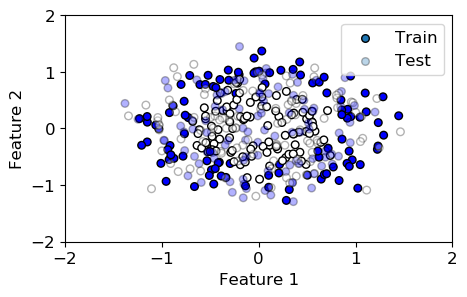

In [11]:
# Plot training and test points
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=30, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_train, cmap=cmap_bold, alpha=0.3,
            edgecolor='k', s=30, label='Test')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

In [12]:
model_lr = LogisticRegression(penalty='none', fit_intercept=True, solver='saga', n_jobs=2,  tol =1e-15, max_iter=2000)
model_lr.fit(X_train, y_train)

print(model_lr.coef_.round(decimals=4))
print(model_lr.intercept_.round(decimals=4))

predictions = model_lr.predict_proba(X_test)[:,1].T
predictions_cat = model_lr.predict(X_test)

print(classification_report(y_test,predictions_cat))
print(confusion_matrix(y_test,predictions_cat))
print("Log Loss:", log_loss(y_test, predictions))
print("AUC:", roc_auc_score(y_test, predictions))  
print("Brier score: (the smaller the better):", brier_score_loss(y_test, predictions))

[[-0.1341 -0.0327]]
[0.0022]
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       100
           1       0.50      0.49      0.49       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

[[51 49]
 [51 49]]
Log Loss: 0.6948995583035551
AUC: 0.4894
Brier score: (the smaller the better): 0.2508742518229471


In [13]:
model_nn = MLPClassifier(hidden_layer_sizes=(5), random_state=2, max_iter=1000, warm_start=True, 
                         activation='tanh', 
                         solver='sgd', learning_rate='adaptive', learning_rate_init=0.1, validation_fraction=0.3,
                         verbose=True, n_iter_no_change=10, early_stopping=False, alpha=0.01, shuffle=True)
model_nn.fit(X_train, y_train)

Iteration 1, loss = 0.74139528
Iteration 2, loss = 0.73101380
Iteration 3, loss = 0.71928450
Iteration 4, loss = 0.70846036
Iteration 5, loss = 0.69994756
Iteration 6, loss = 0.69420595
Iteration 7, loss = 0.69092497
Iteration 8, loss = 0.68934849
Iteration 9, loss = 0.68860996
Iteration 10, loss = 0.68798189
Iteration 11, loss = 0.68700346
Iteration 12, loss = 0.68549882
Iteration 13, loss = 0.68352121
Iteration 14, loss = 0.68126236
Iteration 15, loss = 0.67895910
Iteration 16, loss = 0.67681873
Iteration 17, loss = 0.67497344
Iteration 18, loss = 0.67346527
Iteration 19, loss = 0.67225614
Iteration 20, loss = 0.67125368
Iteration 21, loss = 0.67034278
Iteration 22, loss = 0.66941417
Iteration 23, loss = 0.66838450
Iteration 24, loss = 0.66720558
Iteration 25, loss = 0.66586384
Iteration 26, loss = 0.66437263
Iteration 27, loss = 0.66276110
Iteration 28, loss = 0.66106311
Iteration 29, loss = 0.65930852
Iteration 30, loss = 0.65751816
Iteration 31, loss = 0.65570252
Iteration 32, los

Iteration 438, loss = 0.22378543
Iteration 439, loss = 0.22378186
Iteration 440, loss = 0.22377864
Iteration 441, loss = 0.22377572
Iteration 442, loss = 0.22377308
Iteration 443, loss = 0.22377070
Iteration 444, loss = 0.22376853
Iteration 445, loss = 0.22376657
Iteration 446, loss = 0.22376479
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000032
Iteration 447, loss = 0.22376318
Iteration 448, loss = 0.22376173
Iteration 449, loss = 0.22376042
Iteration 450, loss = 0.22375925
Iteration 451, loss = 0.22375819
Iteration 452, loss = 0.22375723
Iteration 453, loss = 0.22375636
Iteration 454, loss = 0.22375558
Iteration 455, loss = 0.22375487
Iteration 456, loss = 0.22375423
Iteration 457, loss = 0.22375366
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000006
Iteration 458, loss = 0.22375313
Iteration 459, loss = 0.22375266
Iteration 460, loss = 0.22375224
Iteration 461

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='adaptive',
              learning_rate_init=0.1, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.3, verbose=True,
              warm_start=True)

In [14]:
total_parameters = 0

for i in range(0,len(model_nn.coefs_)):
    print('Layer connection:', i, '| weight matrix shape:', np.array(model_nn.coefs_[i]).shape, 
          '| bias matrix shape:', np.array(model_nn.intercepts_[i]).shape) 
    total_parameters = total_parameters + np.array(model_nn.coefs_[i]).shape[0] * np.array(model_nn.coefs_[i]).shape[1] + model_nn.intercepts_[i].shape[0]

print('Total number of parameters:', total_parameters)

Layer connection: 0 | weight matrix shape: (2, 5) | bias matrix shape: (5,)
Layer connection: 1 | weight matrix shape: (5, 1) | bias matrix shape: (1,)
Total number of parameters: 21


In [15]:
predictions = model_nn.predict_proba(X_test)[:,1].T
predictions_cat = model_nn.predict(X_test)

print(classification_report(y_test,predictions_cat))
print(confusion_matrix(y_test,predictions_cat))
print("Log Loss:", log_loss(y_test, predictions))
print("AUC:", roc_auc_score(y_test, predictions)) 
print("Brier score: (the smaller the better):", brier_score_loss(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       100
           1       0.91      0.84      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

[[92  8]
 [16 84]]
Log Loss: 0.27214081352294295
AUC: 0.9551
Brier score: (the smaller the better): 0.08273066180945905


## Practical Implementation

In [16]:
from dcr import *
data = data.query('time <=40').copy()

_, data_train, data_test, X_train_scaled, X_test_scaled, y_train, y_test = dataprep(data, depvar='default_time', splitvar='time', threshold=26)

In [17]:
print('Observations in train data: ', X_train_scaled.shape)
print('Observations in test data: ', X_test_scaled.shape)
print('Default rate in train data: ', np.mean(y_train).round(4))
print('Default rate in test data: ', np.mean(y_test).round(4))

Observations in train data:  (12702, 11)
Observations in test data:  (27368, 11)
Default rate in train data:  0.0104
Default rate in test data:  0.0355


In [18]:
np.random.seed(12345)
model_nn = MLPClassifier(hidden_layer_sizes=(3), random_state=2, max_iter=3000, warm_start=True, 
                         activation='relu', 
                         solver='sgd', learning_rate='adaptive', learning_rate_init=0.1, validation_fraction=0.3,
                         verbose=False, n_iter_no_change=10, early_stopping=False, alpha=0.001, shuffle=True)

model_nn.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='adaptive',
              learning_rate_init=0.1, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.3, verbose=False,
              warm_start=True)

In [19]:
total_parameters = 0

for i in range(0,len(model_nn.coefs_)):
    print('Layer connection:', i, '| weight matrix shape:', np.array(model_nn.coefs_[i]).shape, 
          '| bias matrix shape:', np.array(model_nn.intercepts_[i]).shape) 
    total_parameters = total_parameters + np.array(model_nn.coefs_[i]).shape[0]*np.array(model_nn.coefs_[i]).shape[1] + model_nn.intercepts_[i].shape[0]

print('Total number of parameters:', total_parameters)

Layer connection: 0 | weight matrix shape: (11, 3) | bias matrix shape: (3,)
Layer connection: 1 | weight matrix shape: (3, 1) | bias matrix shape: (1,)
Total number of parameters: 40


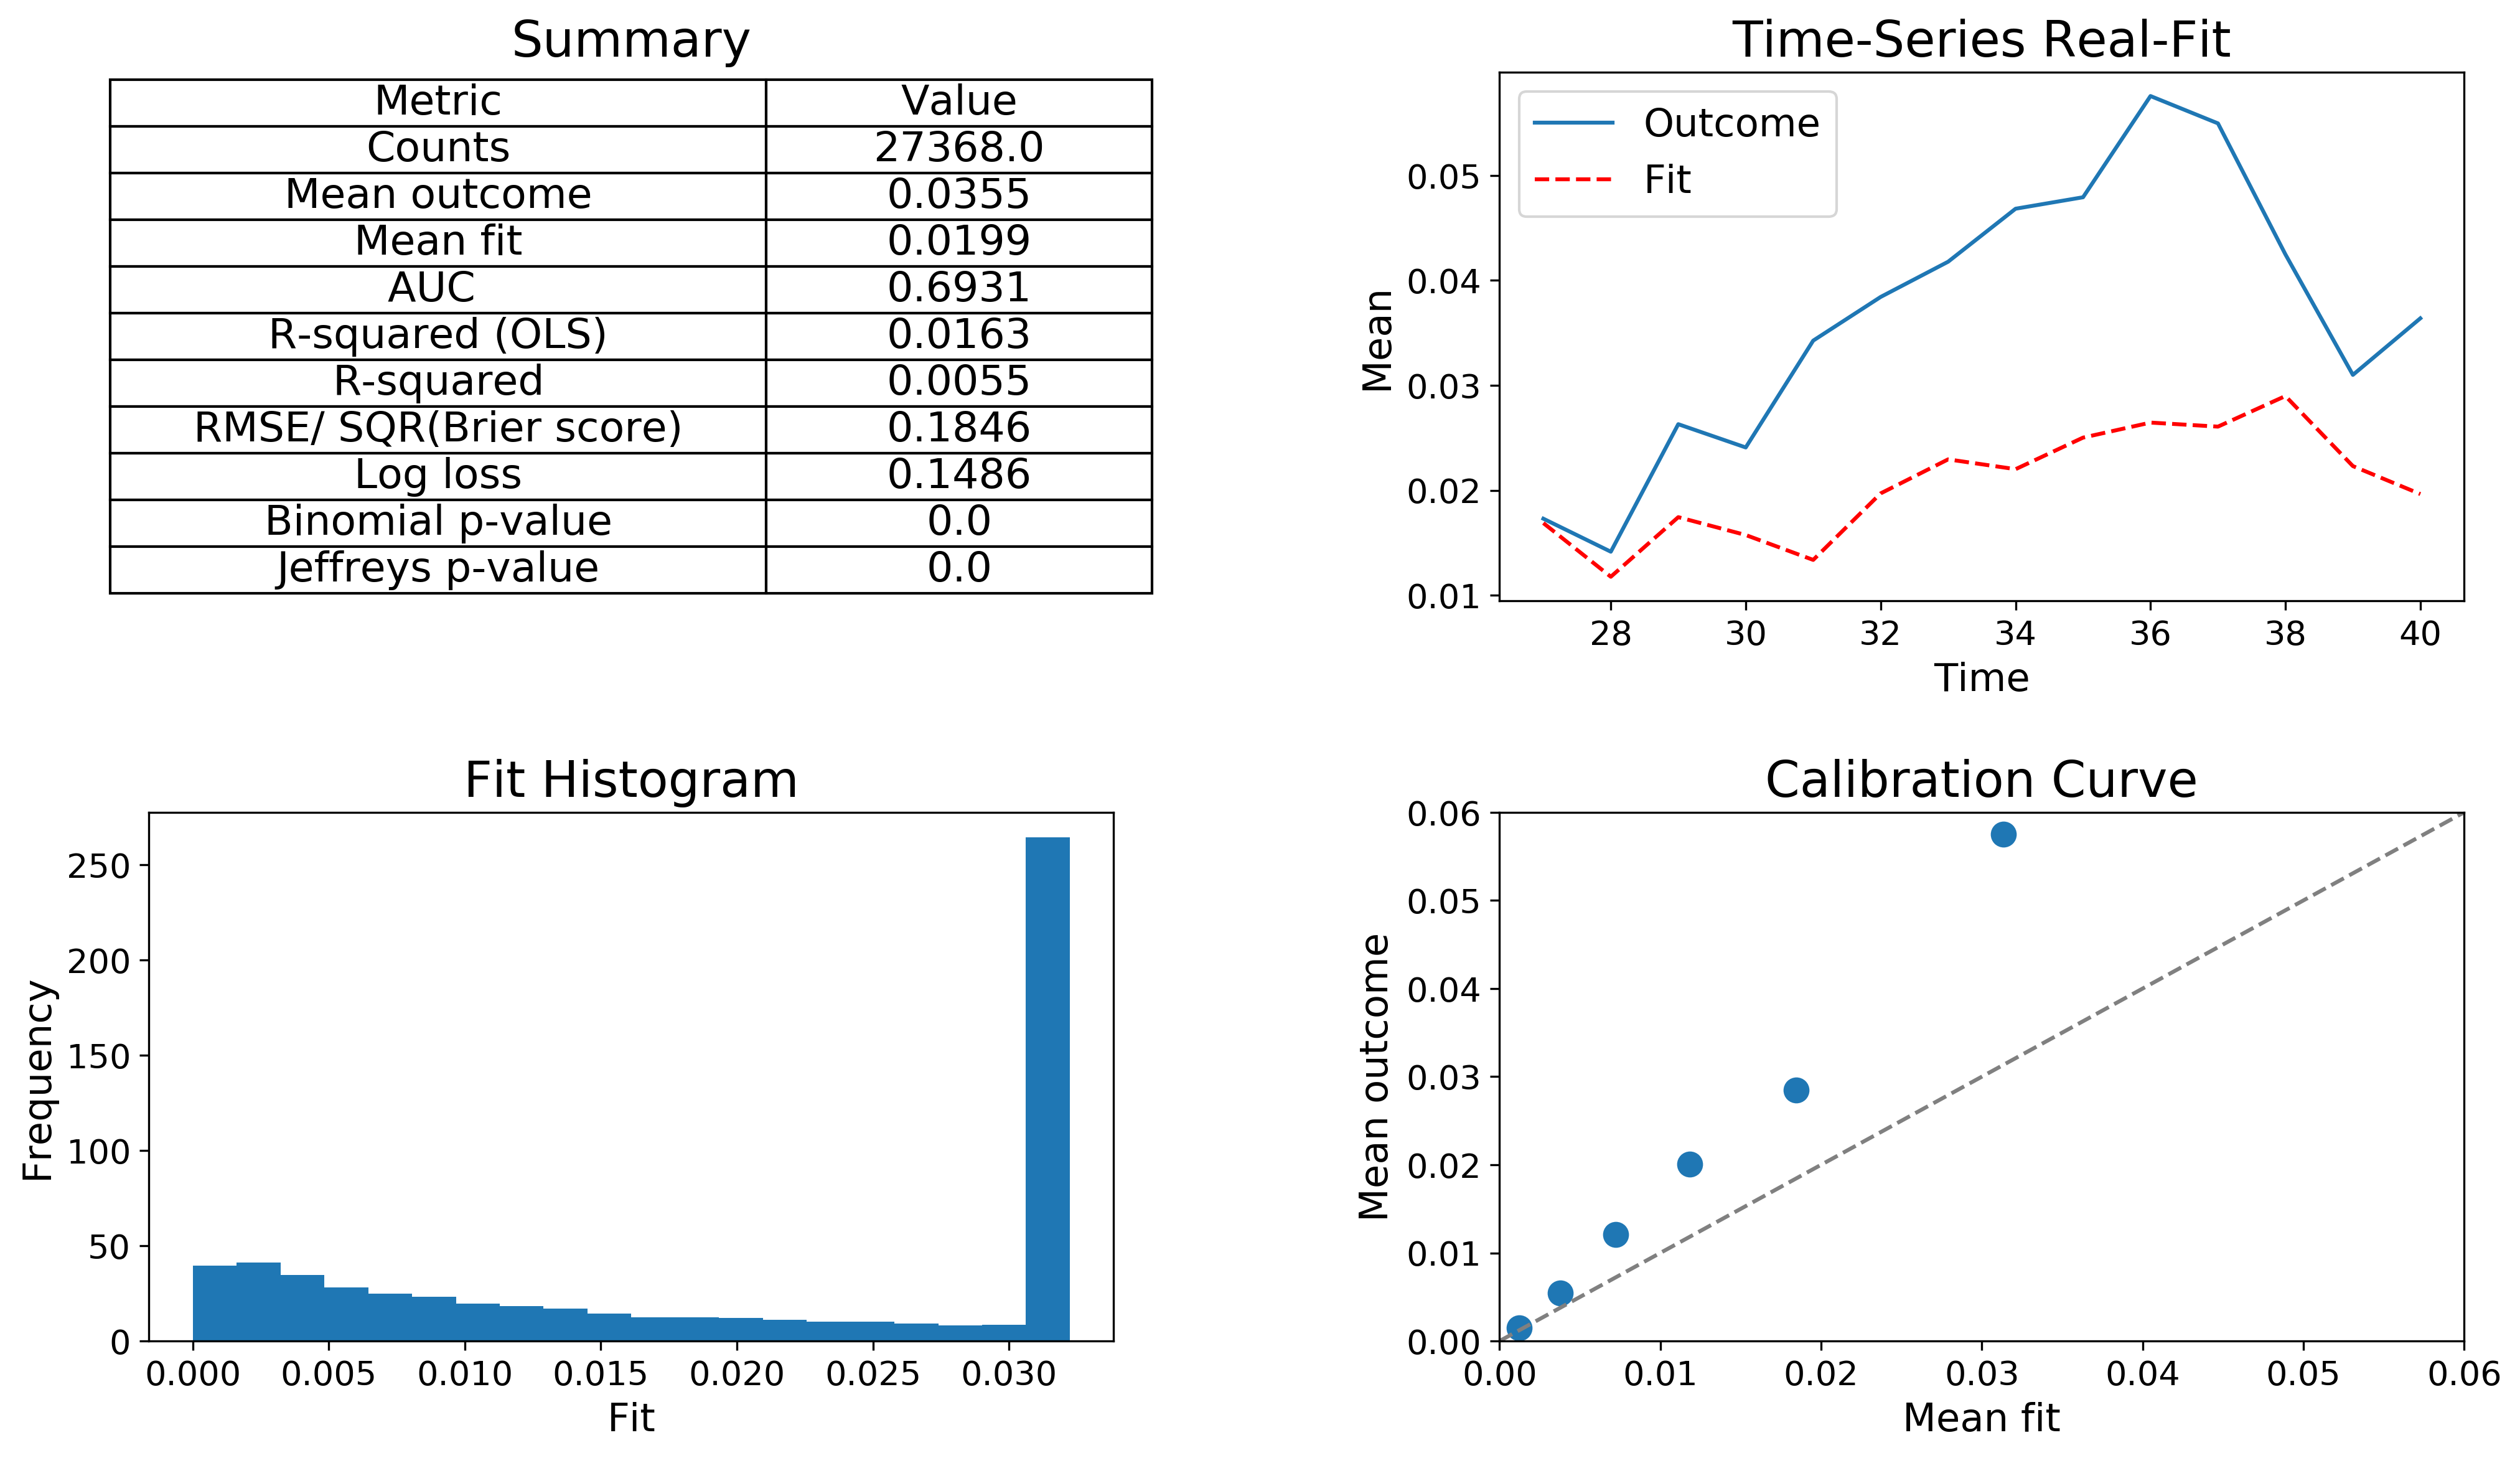

In [20]:
predictions_test = model_nn.predict_proba(X_test_scaled)[:,1].T

validation(predictions_test, y_test, data_test['time'].values)

In [21]:
model_nn_cv=MLPClassifier(random_state=2, max_iter=3000, warm_start=True,  
                         learning_rate='adaptive',  validation_fraction=0.3,
                         verbose=False, n_iter_no_change=10, early_stopping=True, shuffle=True)

param_grid = {'hidden_layer_sizes':[(1), (2), (3), (13), (3,2) ,(13,26), (13,100,), (13,1)], 
              'learning_rate_init':[0.01, 0.1], 
              'alpha':[0.001], 
              'activation': ['relu', 'tanh'],
              'solver': ['sgd']}

gs_nn= GridSearchCV(estimator =model_nn_cv, param_grid = param_grid, n_jobs=2, cv=5, verbose=0, scoring='roc_auc')

gs_nn.fit(X_train_scaled, y_train)

print(gs_nn.best_params_, gs_nn.best_score_)

# Save the model to disk
filename = 'Mortgage_nn_GridSearch.sav'
pickle.dump(gs_nn, open(filename, 'wb'))

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (13, 1), 'learning_rate_init': 0.01, 'solver': 'sgd'} 0.7308941154605434


In [22]:
# Load the model from disk
filename = 'Mortgage_nn_GridSearch.sav'
gs_nn = pickle.load(open(filename, 'rb'))
print(gs_nn.best_params_)

model_nn_best = MLPClassifier(gs_nn.best_params_.get('hidden_layer_sizes'), 
                             activation = gs_nn.best_params_.get('activation'), 
                             solver=gs_nn.best_params_.get('solver'), 
                             learning_rate_init=gs_nn.best_params_.get('learning_rate_init'),
                             alpha=gs_nn.best_params_.get('alpha'), 
                             learning_rate='adaptive',  
                             random_state=2, max_iter=3000, warm_start=False, validation_fraction=0.3,
                             verbose=False, n_iter_no_change=10, early_stopping=False, shuffle=True)

model_nn_best.fit(X_train_scaled, y_train)

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (13, 1), 'learning_rate_init': 0.01, 'solver': 'sgd'}


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 1), learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.3, verbose=False,
              warm_start=False)

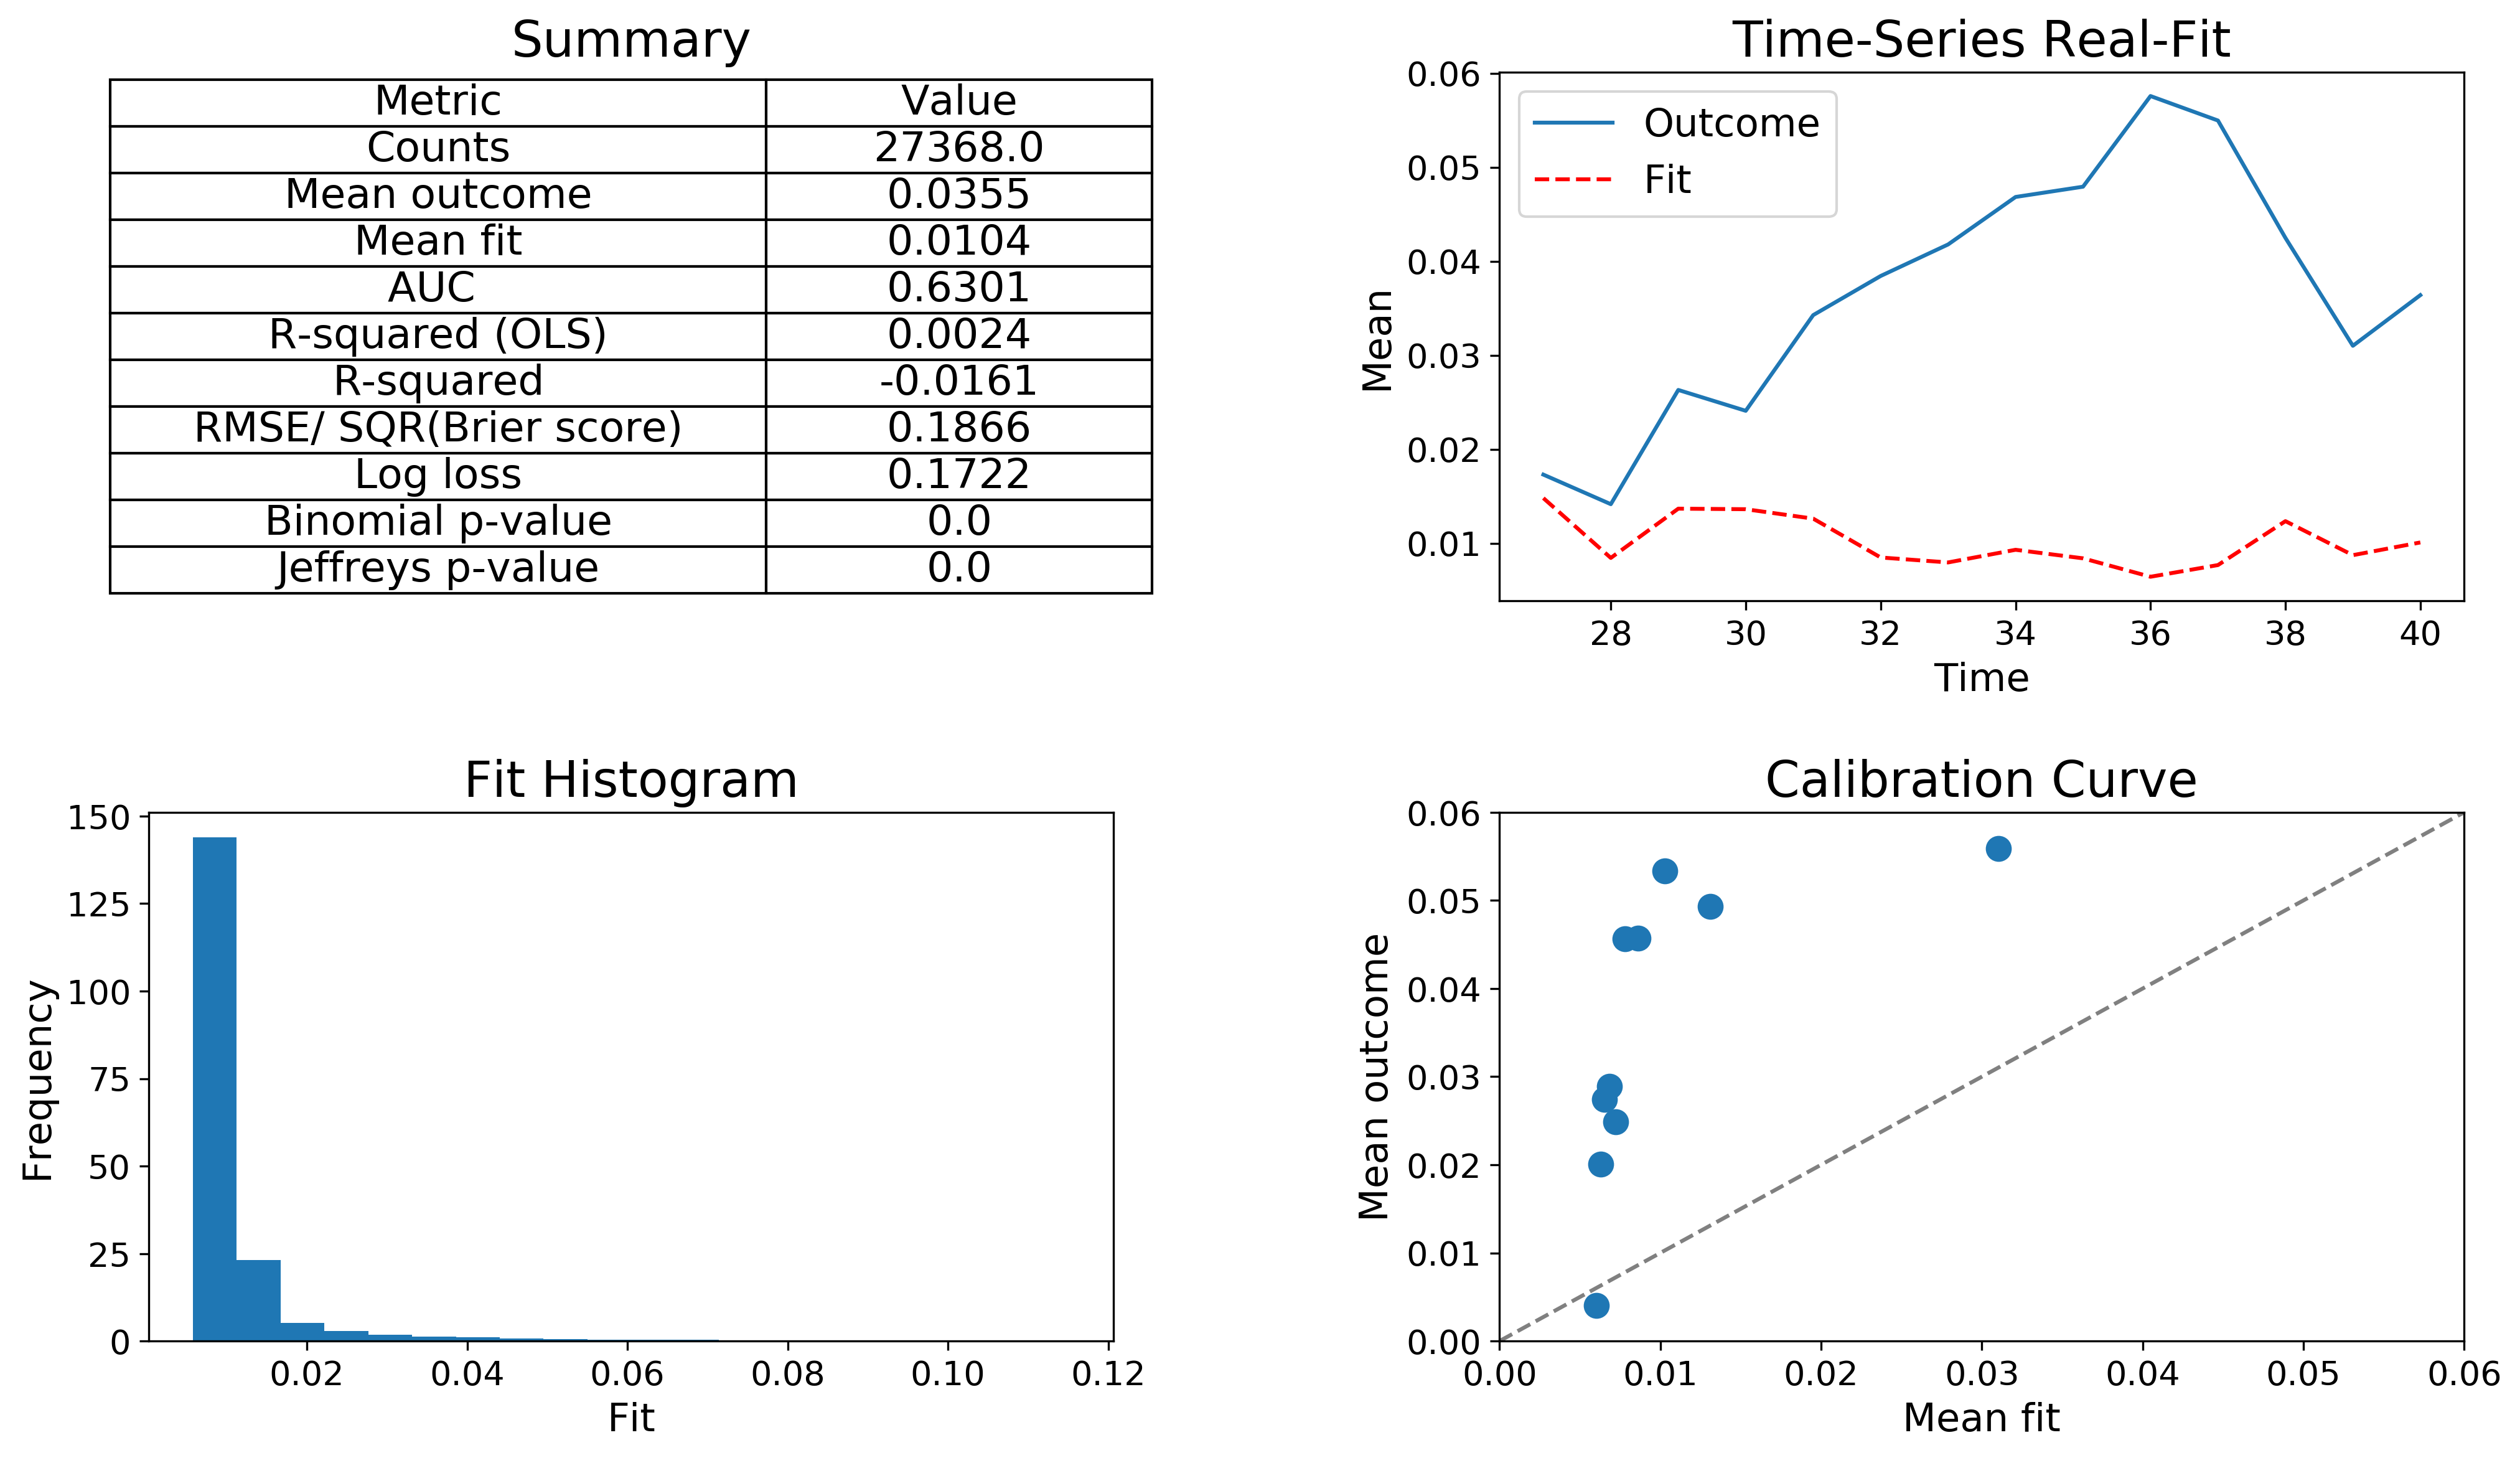

In [23]:
predictions_test = model_nn_best.predict_proba(X_test_scaled)[:,1].T

validation(predictions_test, y_test, data_test['time'].values)

In [24]:
model_nn_cv = MLPClassifier(random_state=2, max_iter=3000, warm_start=False,  
                         learning_rate='adaptive',  validation_fraction=0.3,
                         verbose=False, n_iter_no_change=10, early_stopping=True)
params_grid = {  
    'hidden_layer_sizes': sp_randint(1,100),
    'learning_rate_init': expon(scale=1),
    'alpha': expon(scale=1),              
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']}
rs_nn = RandomizedSearchCV(model_nn_cv, params_grid, verbose=0, n_iter=100, n_jobs=2, cv=5, scoring='roc_auc')

rs_nn.fit(X_train_scaled, y_train)

print(rs_nn.best_params_, rs_nn.best_score_)

# Save the model to disk
filename = 'Mortgage_nn_RandomizedGridSearch.sav'
pickle.dump(rs_nn, open(filename, 'wb'))

{'activation': 'relu', 'alpha': 0.5365233834116643, 'hidden_layer_sizes': 8, 'learning_rate_init': 0.631310595026792, 'solver': 'sgd'} 0.7732509343686751


In [25]:
# Load the model from disk
filename = 'Mortgage_nn_RandomizedGridSearch.sav'
rs_nn = pickle.load(open(filename, 'rb'))

model_nn_best = MLPClassifier(rs_nn.best_params_.get('hidden_layer_sizes'), 
                             activation = rs_nn.best_params_.get('activation'), 
                             solver=rs_nn.best_params_.get('solver'), 
                             learning_rate_init=rs_nn.best_params_.get('learning_rate_init'),
                             alpha=rs_nn.best_params_.get('alpha'), 
                             learning_rate='adaptive',  
                             random_state=2, max_iter=3000, warm_start=True, validation_fraction=0.3,
                             verbose=False, n_iter_no_change=10, early_stopping=False, shuffle=True)

model_nn_best.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.5365233834116643, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=8, learning_rate='adaptive',
              learning_rate_init=0.631310595026792, max_fun=15000,
              max_iter=3000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=2,
              shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.3,
              verbose=False, warm_start=True)

In [26]:
total_parameters = 0

for i in range(0,len(model_nn_best.coefs_)):
    print('Layer connection:', i, '| weight matrix shape:', np.array(model_nn_best.coefs_[i]).shape, 
          '| bias matrix shape:', np.array(model_nn_best.intercepts_[i]).shape) 
    total_parameters = total_parameters + np.array(model_nn_best.coefs_[i]).shape[0]*np.array(model_nn_best.coefs_[i]).shape[1] + model_nn_best.intercepts_[i].shape[0]

print('Total number of parameters:', total_parameters)

Layer connection: 0 | weight matrix shape: (11, 8) | bias matrix shape: (8,)
Layer connection: 1 | weight matrix shape: (8, 1) | bias matrix shape: (1,)
Total number of parameters: 105


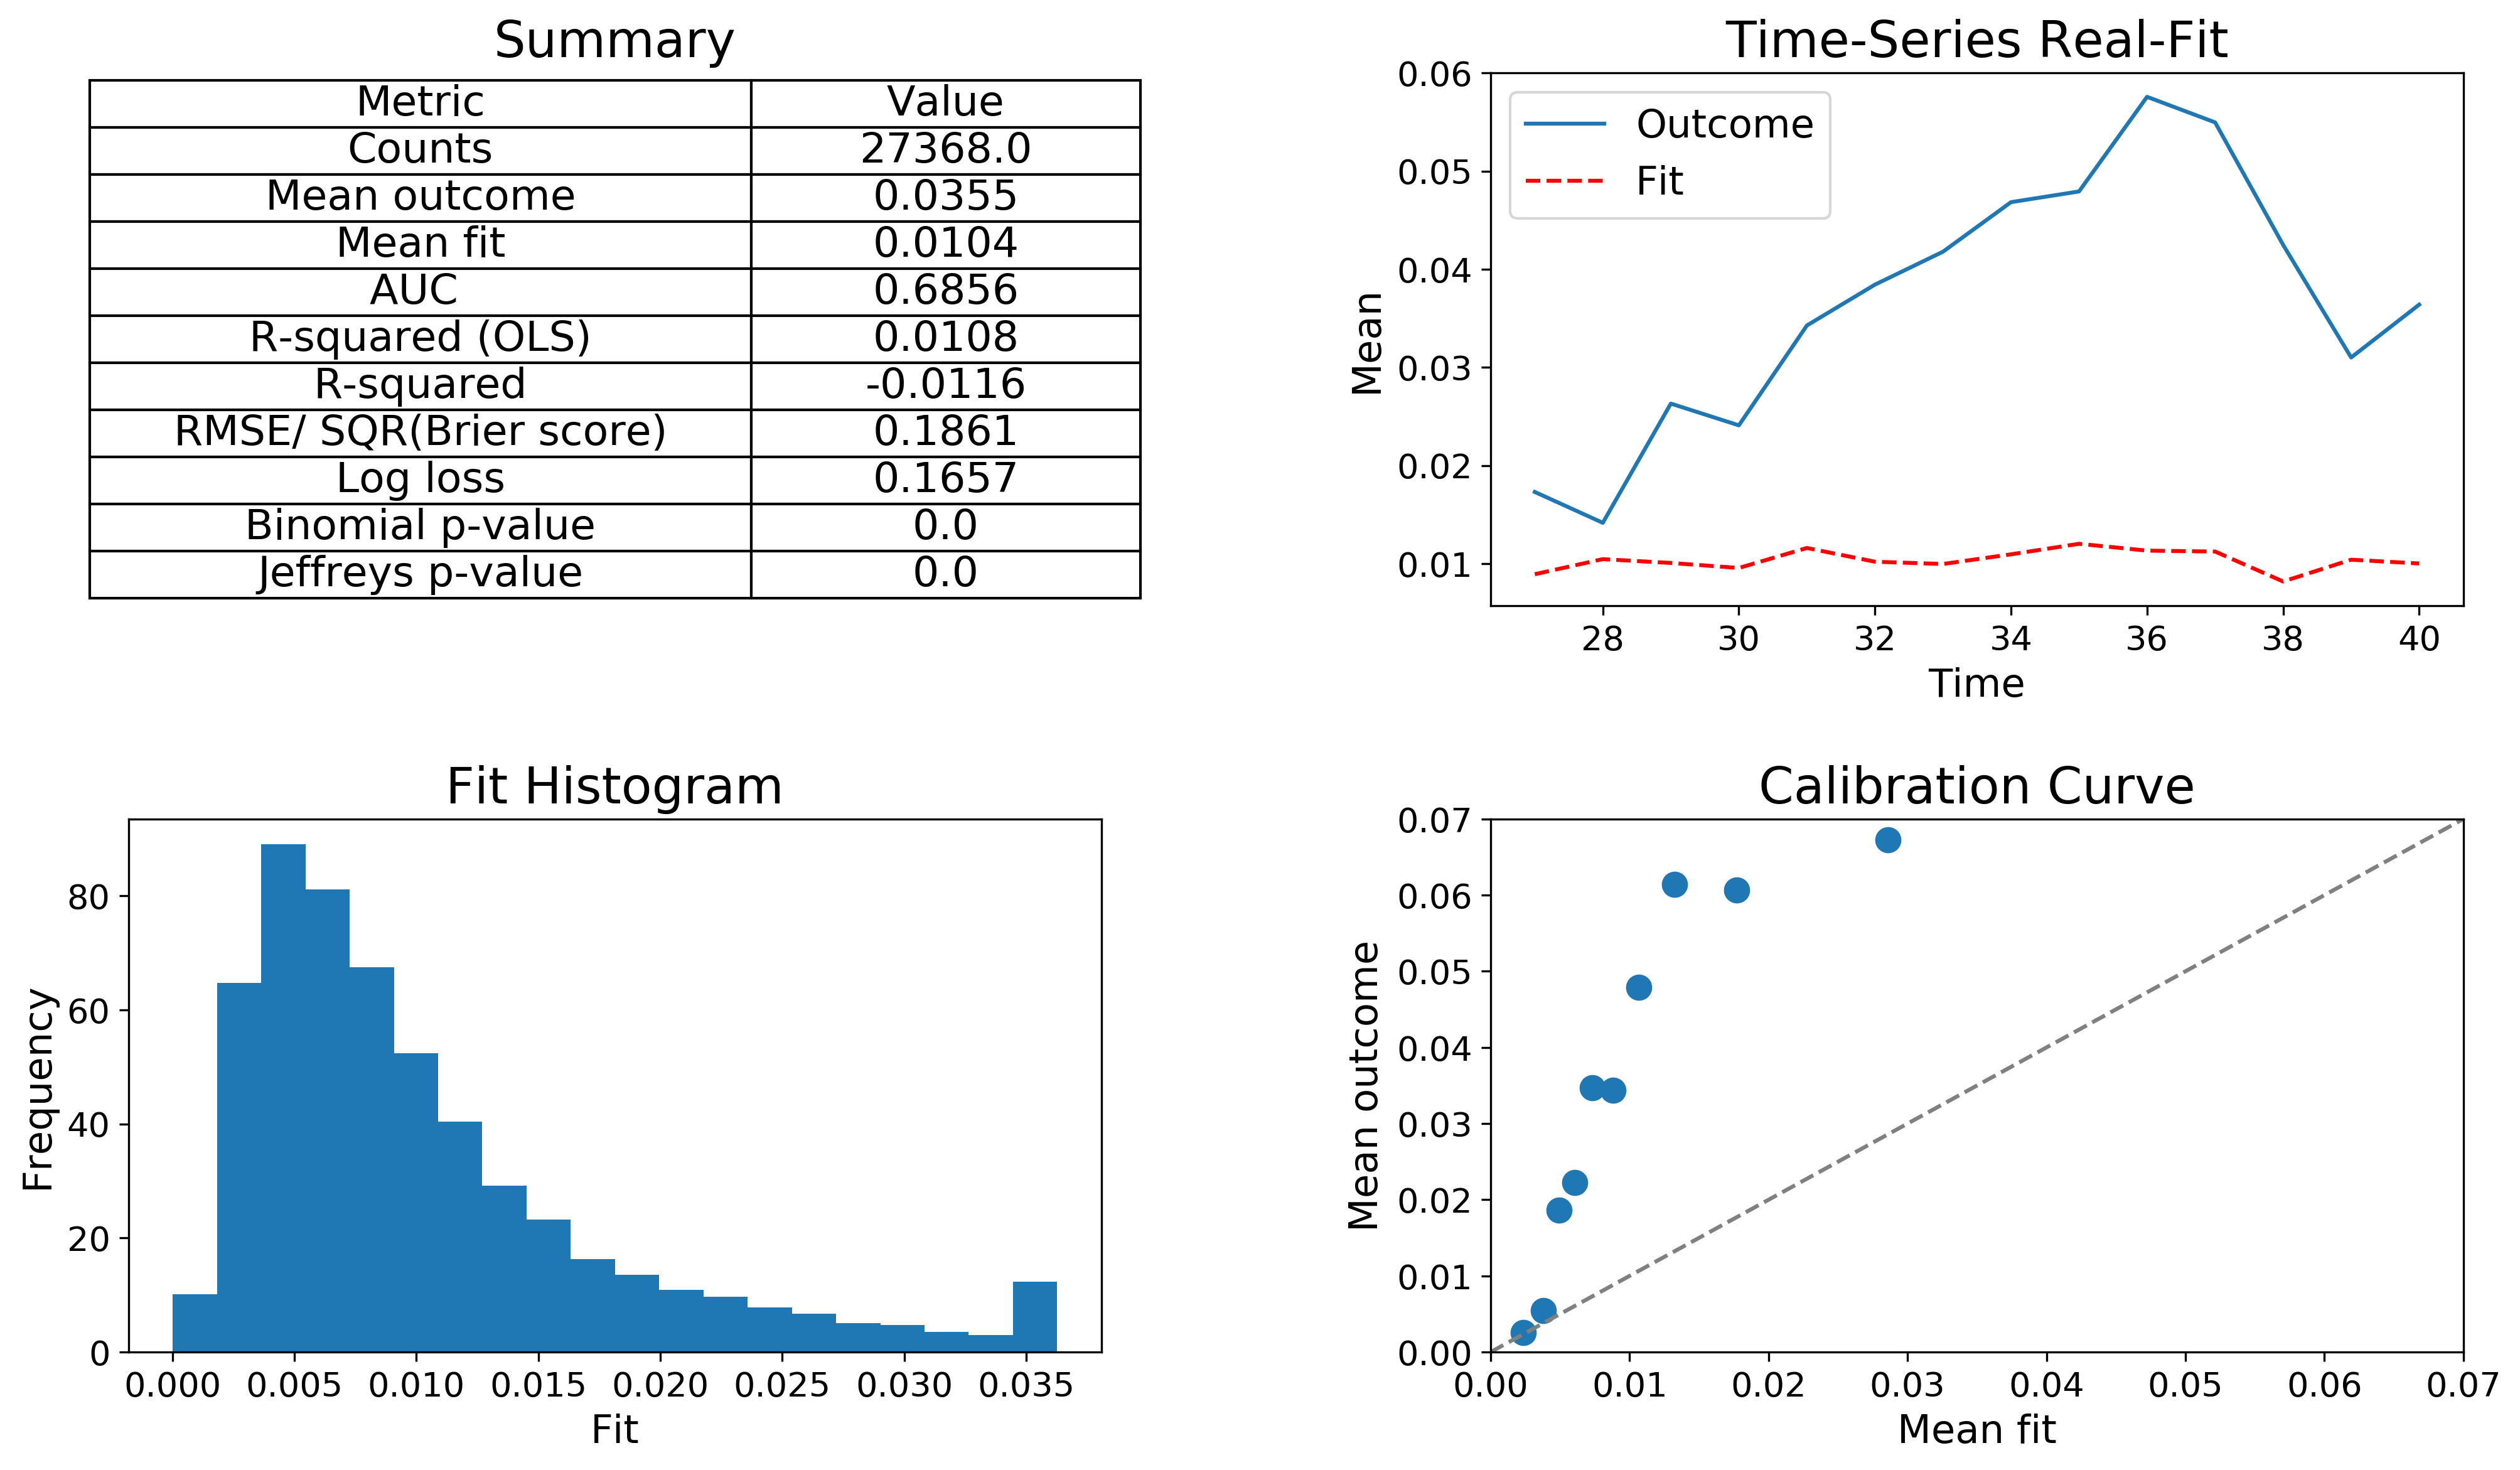

In [27]:
predictions_test = model_nn_best.predict_proba(X_test_scaled)[:,1].T

validation(predictions_test, y_test, data_test['time'].values)

## Extensions

 - Tensorflow (www.tensorflow.org)
 - Keras (www.keras.io) 

# Sandbox problems

 - Use the simulated data from above, alter the number of layers and neurons as hyperparameters and check the performance.
 - Program a neural network for the mortgage data that is identical to logistic regression. 
 - Train a network with two hidden layers with three and ten neurons. How many parameters does the model have?
 - Perform a grid search over one, two, and three layers with numbers of neurons of your choice. 

# Copyright and Disclaimer

Copyright: The workshop resources (handbook and codes) provided to you by Deep Credit Risk are
protected by copyright. You are not permitted to distribute or re-use the workshop materials for
commercial purposes without permission of Deep Credit Risk.

Limit of Liability/Disclaimer of Warranty: While the authors and Deep Credit Risk have used their best effort
in preparing this material, they make no representations or warranties with respect to
the accuracy or completeness of the contents and specifically disclaim any implied
warranties of merchantability or fitness for a particular purpose. No warranty may be
created or extended by sales representatives or written sales materials. The advise and
strategies contained herein may not be suitable for your situation. The authors and Deep Credit Risk shall not
be liable for any loss of profit or any other commercial damages, including but not
limited to special, incidental, consequential, or other damages.